In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df = df.rename(columns={
    'Delivery Time':'Delivery_Time',
    'Sorting Time' :'Sorting_Time'
})

In [5]:
df.shape

(21, 2)

In [6]:
df.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

# 1) Delivery_time -> Predict delivery time using sorting time 


In [7]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

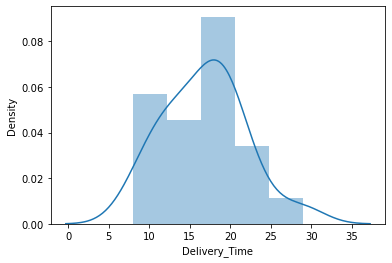

In [8]:
sns.distplot(df['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

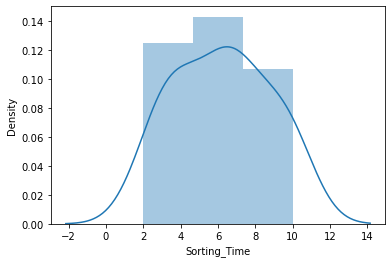

In [9]:
sns.distplot(df['Sorting_Time'])

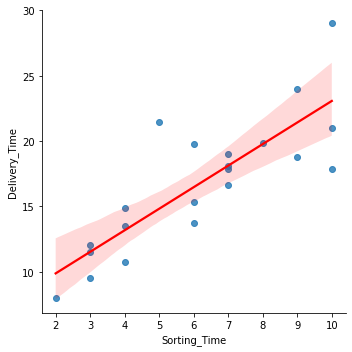

In [31]:
sns.lmplot(x='Sorting_Time', y='Delivery_Time', data=df, line_kws={'color': 'red'})

<AxesSubplot:>

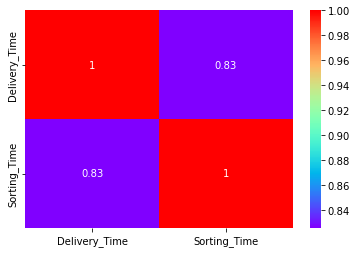

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

In [12]:
import statsmodels.formula.api as smf

In [13]:
model = smf.ols('Delivery_Time~Sorting_Time', data=df).fit()

In [14]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [15]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")

t value is
Intercept       3.823349
Sorting_Time    6.387447
dtype: float64
P value is
Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [16]:
model.rsquared

0.6822714748417231

In [17]:
newdata = pd.Series([3,5,6,7,8,9])

In [18]:
del_pred = pd.DataFrame(newdata,columns=['Sorting_Time'])

In [19]:
del_pred

,Sorting_Time
0,3
1,5
2,6
3,7
4,8
5,9


In [20]:
delivery_time_pred = model.predict(del_pred)

In [21]:
delivery_time_pred

0    11.529794
1    14.827833
2    16.476853
3    18.125873
4    19.774893
5    21.423913
dtype: float64